In [1]:
import numpy as np

In [26]:
data = np.load('data/handout_test.npy')

In [9]:
X = data[:10000,:]
print(X.shape)
kmeans = KMeans(n_clusters=200)
%time kmeans.fit(X)

(10000, 250)
CPU times: user 1min 2s, sys: 4.61 s, total: 1min 7s
Wall time: 1min 2s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:

Y = X[np.random.permutation(X.shape[0])[:200],:]
print(Y.shape)

(200, 250)


In [41]:
def euclidean_distance(X, Y):
    if len(Y.shape) == 1:
        return np.sum((X-Y)**2, axis=1)
    
    assert X.shape[1] == Y.shape[1], 'Last dimension do not match'
    
    result = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        result[i,:] = euclidean_distance(Y, X[i,:])
    return result

class KMeans(object):

    def __init__(self, n_clusters=200, n_init=10, max_iter=300, tol=.0001):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol

    def _kmeans_pp_init(self, X):
        # Centers container
        centers = np.zeros((self.n_clusters, X.shape[-1]))
        # Choose the first center
        centers[0,:] = X[np.random.randint(X.shape[0]),:]

        n_local_trials = 2*int(np.log(self.n_clusters))

        closest_dist_sq = np.sum((X-centers[0])**2, axis=1)
        current_pot = closest_dist_sq.sum()

        for c in range(self.n_clusters - 1):
            rand_vals = np.random.random_sample(n_local_trials) * current_pot
            candidate_ids = np.searchsorted(closest_dist_sq.cumsum(), rand_vals)

            distance_to_candidates = euclidean_distance(X[candidate_ids], X)
            best_candidate = None
            best_pot = None
            best_dist_sq = None
            for trial in range(n_local_trials):
                new_dist_sq = np.minimum(closest_dist_sq,
                                         distance_to_candidates[trial])
                new_pot = new_dist_sq.sum()

                if (best_candidate is None) or (new_pot < best_pot):
                    best_candidate = candidate_ids[trial]
                    best_pot = new_pot
                    best_dist_sq = new_dist_sq
            
            centers[c] = X[best_candidate]
            current_pot = best_pot
            closest_dist_sq = best_dist_sq
        
        print('Initialization kmeans++ finished')
        return centers
            
    def fit(self, X):

        best_centers, best_inertia, best_labels = None, None, None

        n_samples = X.shape[0]


        for i in range(self.n_init):

            # Initialize the centers choosing randomly n_clusters points
            # centers = X[np.random.permutation(X.shape[0])[:self.n_clusters],:]
            centers = self._kmeans_pp_init(X)
            
            it = 0
            prev_L = 0
            while it < self.max_iter:

                L = 0
                # Assign to each point the index of the closest center
                labels = np.zeros(n_samples, dtype='int')
                for j in range(n_samples):
                    d_2 = np.sum((centers-X[j,:])**2, axis=1)
                    labels[j] = np.argmin(d_2)
                    L += np.min(d_2)
                L /= n_samples

                # Update
                for l in range(self.n_clusters):
                    P = X[labels==l,:]
                    centers[l] = np.mean(P, axis=0)

                # Check convergence
                if abs(prev_L - L) < self.tol:
                    break
                prev_L = L

                #print('Iteration {}\tInertia: {}'.format(it, L))
                it += 1

            if it == self.max_iter: print('Maximum iteration reached')
            else: print('Finished with {} iterations and intertia {}'.format(it, L))
            # Compute intertia and update the best parameters
            inertia = L
            if best_inertia is None or inertia < best_inertia:
                best_inertia = inertia
                best_centers = centers
                best_labels = labels

            print('End init {}'.format(i))

        self.cluster_centers_ = best_centers


In [42]:
kmeans = KMeans(n_clusters=200)
X = data[:1000,:]
%time kmeans.fit(X)

Initialization kmeans++ finished
Finished with 7 iterations and intertia 4.316111903430198
End init 0
Initialization kmeans++ finished
Finished with 8 iterations and intertia 4.342793510823031
End init 1
Initialization kmeans++ finished
Finished with 7 iterations and intertia 4.393739510960579
End init 2
Initialization kmeans++ finished
Finished with 8 iterations and intertia 4.327777775042095
End init 3
Initialization kmeans++ finished
Finished with 14 iterations and intertia 4.339279870439088
End init 4
Initialization kmeans++ finished
Finished with 10 iterations and intertia 4.350579746229051
End init 5
Initialization kmeans++ finished
Finished with 7 iterations and intertia 4.3789017136882755
End init 6
Initialization kmeans++ finished
Finished with 8 iterations and intertia 4.348105085255257
End init 7
Initialization kmeans++ finished
Finished with 8 iterations and intertia 4.346033050439061
End init 8
Initialization kmeans++ finished
Finished with 9 iterations and intertia 4.3456

In [43]:
kmeans.cluster_centers_

array([[ -2.12554856e+00,   8.53811117e-02,   5.05521858e-01, ...,
         -8.38673285e-02,   6.35224359e-02,  -6.09347910e-02],
       [  1.09764621e+00,   4.64237909e+00,   5.20233202e+00, ...,
          3.72987255e+00,  -7.49881911e-02,   5.60653651e+00],
       [  3.93047557e+00,   2.21806991e-01,  -5.76953517e-01, ...,
         -1.58185758e-02,  -3.49364676e-03,  -1.38816826e-02],
       ..., 
       [  1.42550827e-01,   1.95269054e+00,   3.57837703e-01, ...,
         -4.52166278e-03,  -1.22249452e-02,   6.47396512e-05],
       [ -2.92694814e+00,  -4.46473285e-01,   2.73627584e-01, ...,
         -2.28395512e-02,   2.68499910e-03,   4.22166468e-02],
       [  1.58667798e-01,  -2.85892451e-02,  -1.41631252e-02, ...,
          5.93032968e-03,  -8.89347445e-03,  -7.48149921e-04]])

# Test the Coresets sampling

First the $D^2$ sampling:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def euclidean_distance(X, Y):
    if len(Y.shape) == 1:
        return np.sum((X-Y)**2, axis=1)

    assert X.shape[1] == Y.shape[1], 'Last dimension do not match'

    result = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        result[i,:] = euclidean_distance(Y, X[i,:])
    return result

def kmeans_pp(X, n_clusters):
    """ kmeans++ algorithm to find a proper cluster centers given a dataset of points """
    # Extract some values
    N, d = X.shape

    # Centers container
    centers = np.empty((n_clusters, d), dtype=X.dtype)
    # Squared distance of each point to its closest center
    dist = np.empty((N, n_clusters), dtype='float')

    indexes = np.arange(N)
    p = np.ones((N))
    p /= p.sum()

    for i in range(n_clusters):
        # Sample following the given probability distribution
        idx = np.random.choice(indexes, p=p)
        # And store the sampled point into the centers container
        centers[i] = X[idx]

        # Squared distance of each point to its closest center
        dist[:,i] = euclidean_distance(X, centers[i])
        min_dist = dist[:,:i+1].min(axis=1) # Distance to closest center

        # Compute the probability distribution normalizing the squared distance
        p = min_dist / min_dist.sum()
        
        plt.scatter(X[:,0], X[:,1], s=(100*p)**2, c='r')
        plt.scatter(centers[:i+1,0], centers[:i+1,1], c='b')
        plt.show()


    return centers

Create a random dataset with little clusters.

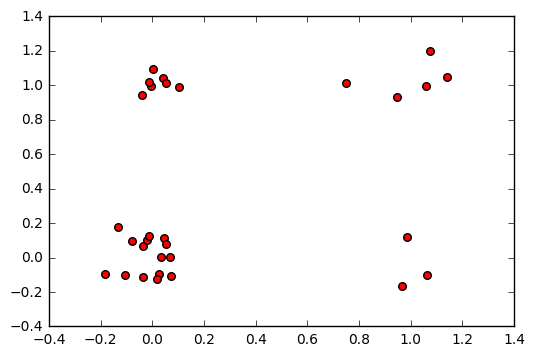

In [4]:
def generate_data(L=1, S=.1):
    np.random.seed(23)
    L = 1
    S = .1
    X = np.empty((30, 2))
    X[:15,:] = [0, 0]
    X[15:20] = [L, L]
    X[20:27] = [0, L]
    X[27:30] = [L, 0]
    noise = np.random.normal(scale=S, size=X.shape)
    X += noise
    return X

X = generate_data()
plt.scatter(X[:,0], X[:,1], s=30, c='r')
plt.show()

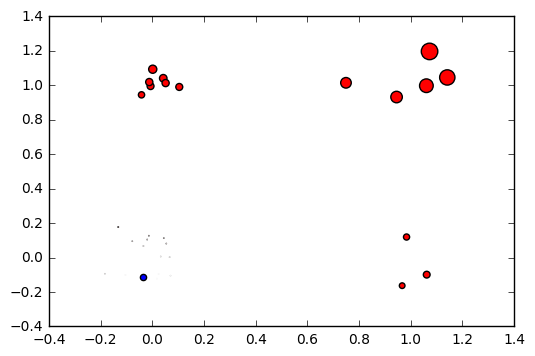

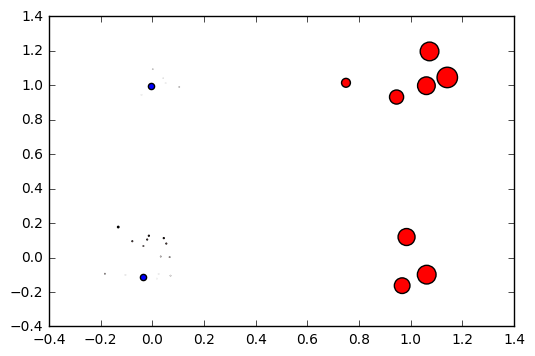

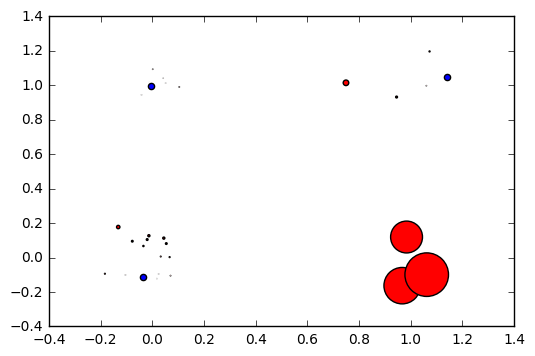

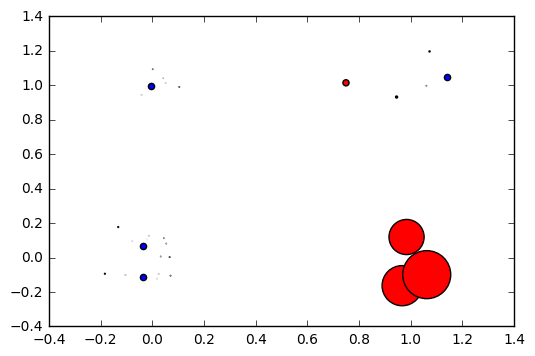

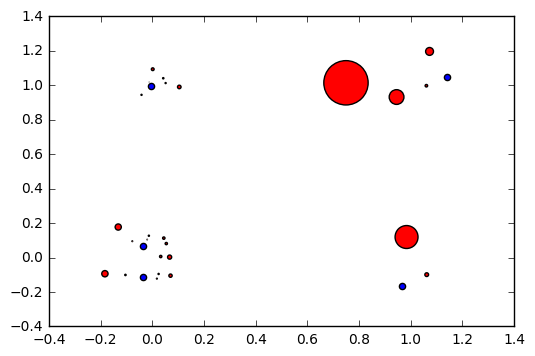

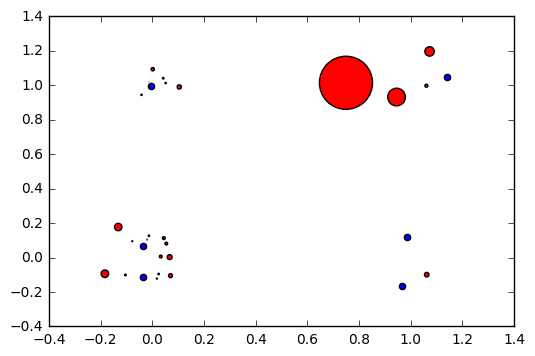

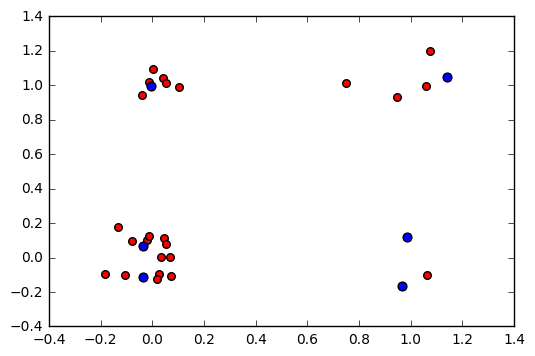

In [5]:
c = kmeans_pp(X, 6)
plt.scatter(X[:,0], X[:,1], s=30, c='r')
plt.scatter(c[:,0], c[:,1], s=40, c='b')
plt.show()

Now try with the implementation of the importance sampling

In [6]:
def importance_sampling(X, n_centers):
    """ Implementation of the importance sampling """
    # Extract some values
    N, d = X.shape

    # Centers container
    centers = np.empty((n_centers, d), dtype=X.dtype)
    # Squared distance of each point to its closest center
    dist = np.empty((N, n_centers), dtype='float')

    alpha = 1 + np.log2(n_centers)

    # Initial sampling distribution (uniformly)
    indexes = np.arange(N)
    q = np.ones(N) * 1 / N

    for i in range(n_centers):
        # Sample following the given probability distribution
        idx = np.random.choice(indexes, p=q)
        # And store the sampled point into the centers container
        centers[i] = X[idx]

        # Squared distance of each point to its closest center
        dist[:,i] = euclidean_distance(X, centers[i])
        min_dist = dist[:,:i+1].min(axis=1) # Distance to closest center

        c_phi = min_dist.mean()
        q = alpha * min_dist / c_phi

        min_i = np.argmin(dist[:,:i+1], axis=1)

        for j in range(N):
            idx_B = min_i == min_i[j]
            q[j] += 2 * alpha * min_dist[idx_B].sum() / (idx_B.sum() * c_phi)

            q[j] += 4 * N / idx_B.sum()

        # Normalize sample weights
        q /= q.sum()
        
        plt.scatter(X[:,0], X[:,1], s=(100*q)**2, c='r')
        plt.scatter(centers[:i+1,0], centers[:i+1,1], c='b')
        plt.show()

    return centers


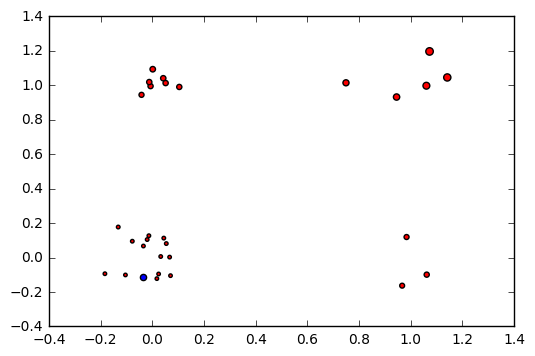

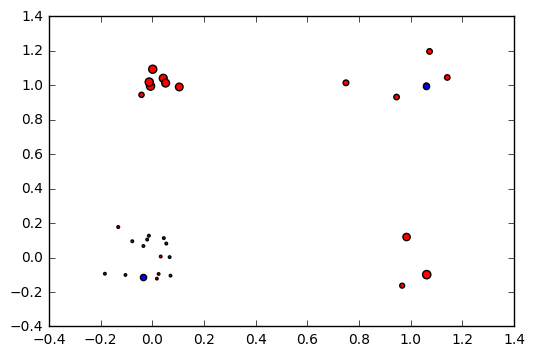

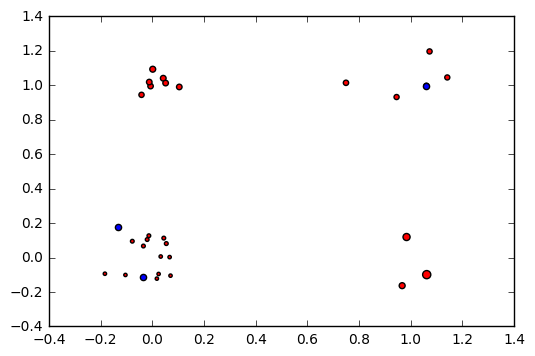

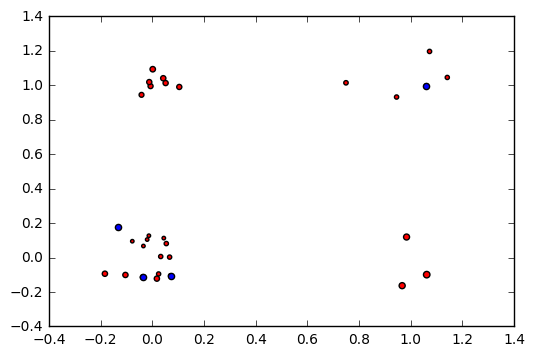

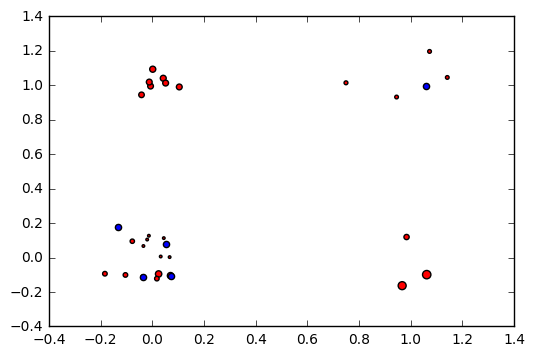

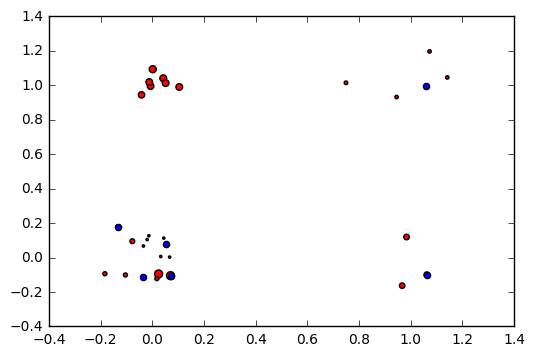

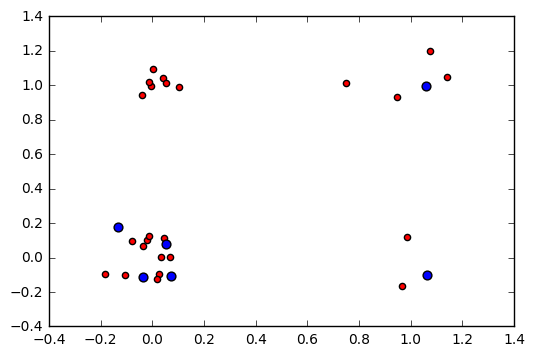

In [13]:
X = generate_data(L=2, S=.1)

c = importance_sampling(X, 6)
plt.scatter(X[:,0], X[:,1], s=20, c='r')
plt.scatter(c[:,0], c[:,1], s=40, c='b')
plt.show()